# **'Fraudify.py' - A Siamese Convolutional Neural Network based signature verification program**




---


## *With references to the work of multiple authors of which helped in implementation and/or understanding;;*


*   SigNet: Convolutional Siamese Network for Writer Independent Offline Signature Verification by (Dey, S., et al. 2017)


*  Siamese Network Signature Verification - Kaggle (Chauhan, S., 2021)


*   Sign Forgery Detection Using Conv Siamese Network - Kaggle (Azar,K., 2021)



*   CEDAR Dataset



*   Signature Forgery Detection - GitHub (Shakti365, 2021)



---









---
## *Phase 2: SCNN-based Fraudify.py application*  


Creating a SCNN based Static Signature Verification application to comparatively assess and analysis its accuracy and optimisatio, im comparison to Phase 1 CNN based Fraudify application.

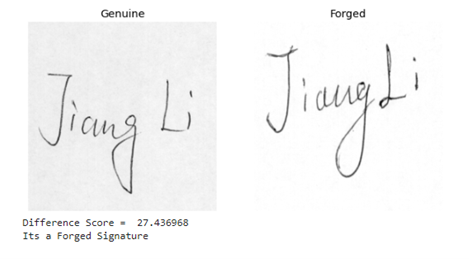






In [ ]:
#Importing all necessary libraries

import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform

from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



import cv2 as cv

In [ ]:
#Mounting my drive to google colab for access within the drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#to find if GPU is being used

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Path of the dataset is called to path variable

path = '/content/gdrive/MyDrive/FYP/CEDAR/'

In [ ]:
#Dir_list is a variable create to get the list of all the directories which are in the CEDAR Dataset 
#dir_list.sort() provides that the list of the directories is sorted

dir_list = next(os.walk(path))[1]
dir_list.sort()

In [ ]:
#Printing the list of directories we can see it is of around 46 individuals who have their own subdirectory of signatures

dir_list

['1',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55']

In [ ]:
#In this section we are segregating the Genuine signatures from the Forged signatures of each individual
#I have created two lists, one is 'genuine_groups' for all the genuine signatures and 'forged_groups' for all the forged signatures.
#For loop created for all directories within the dir_list list.
#Within the for loop, images are gained with their path and the directory.
#The images are sorted

# For each person segregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
genuine_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path + directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:24]) # First 24 signatures are forged
    genuine_groups.append(images[24:]) # Next 24 signatures in each folder are genuine

In [ ]:
# Quick check to confirm we have data of all the 160 individuals
len(genuine_groups), len(forg_groups)

(46, 46)

In [ ]:
genuine_groups[1]

['/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_1.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_10.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_11.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_12.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_13.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_14.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_15.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_16.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_17.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_18.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_19.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_2.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_20.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_21.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_22.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/original_11_23.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/ori

In [ ]:
forg_groups[1]

['/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_1.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_10.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_11.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_12.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_13.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_14.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_15.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_16.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_17.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_18.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_19.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_2.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_20.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_21.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_22.png',
 '/content/gdrive/MyDrive/FYP/CEDAR/11/forgeries_11_23.png',
 '/content/gdrive/MyDrive/

In [ ]:
genuine_lengths = [len(x) for x in genuine_groups]
forg_lengths = [len(x) for x in forg_groups]

In [ ]:
print(genuine_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
print(forg_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
orig_train, orig_val, orig_test = genuine_groups[:30], genuine_groups[30:38], genuine_groups[38:]
forg_train, forg_val, forg_test = forg_groups[:30], forg_groups[30:38], forg_groups[38:]

In [ ]:
forg_train

[['/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_1.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_10.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_11.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_12.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_13.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_14.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_15.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_16.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_17.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_18.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_19.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_2.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_20.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_21.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_22.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/forgeries_1_23.png',
  '/content/gdrive/MyDrive/FYP/CEDAR/1/for

In [ ]:
# Delete unnecessary variables
del genuine_groups, forg_groups

In [ ]:
# All the images will be converted to the same size before processing
img_h, img_w = 512, 512

In [ ]:
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread

(-0.5, 511.5, 511.5, -0.5)

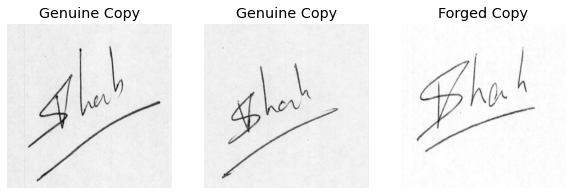

In [ ]:
#Visualising the sample data with two Genuine copies of the signautes 
#and the appropriate forged copy. 
#Function to randomly select a signature from train set and
#print two genuine copies and one forged copy
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))
k = np.random.randint(len(orig_train))
orig_img_names = random.sample(orig_train[k], 2)
forg_img_name = random.sample(forg_train[k], 1)

orig_img1 = cv2.imread(orig_img_names[0], 0)
orig_img2 = cv2.imread(orig_img_names[1], 0)
forg_img = cv2.imread(forg_img_name[0], 0)
    
orig_img1 = cv2.resize(orig_img1, (img_w, img_h),)
orig_img2 = cv2.resize(orig_img2, (img_w, img_h),)
forg_img = cv2.resize(forg_img, (img_w, img_h),)

ax1.imshow(orig_img1, cmap = 'gray')
ax1.set_title('Genuine Copy')
ax1.axis('off')


ax2.imshow(orig_img2, cmap = 'gray')
ax2.set_title('Genuine Copy')
ax2.axis('off')

ax3.imshow(forg_img, cmap = 'gray')
ax3.set_title('Forged Copy')
ax3.axis('off')







In [ ]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []
        
    # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 , 12 * 23 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 276 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # 24*23/2=276 
        # Total no. of Genuine-Genuine pairs =  
        # Total number of Genuine-Forged pairs = 
        # Total no. of data points = 
        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        #print(len(orig_pairs),len(forg_pairs))
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)
        
        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.
            
        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
        #print(pairs)
        targets=np.zeros((batch_size,))
        #print(targets)
        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0], 0)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_w, img_h),interpolation=cv2.INTER_AREA)
            img2 = cv2.resize(img2, (img_w, img_h),interpolation=cv2.INTER_AREA)

            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))
        
    return pairs, targets




In [ ]:
def euclidean_distance(vects):
    ##Compute Euclidean Distance between the two vectors
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    Source: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    
    Explanation:
    When ytrue is 1, that means the sample are duplicates of each other, 
    so the Euclidean distance (ypred) between their outputs must be minimized.
    So the loss is taken as the square of that Euclidean distance itself - K.square(y_pred).
    When ytrue is 0, i.e. the samples are not duplicates, then the Euclidean distance 
    between them must be maximized, at least to the margin. So the loss to be minimized
    is the difference of the margin and the Euclidean distance - (margin - y_pred).
    If the Euclidean distance (ypred) is already greater than the margin, 
    then nothing is to be learned, so the loss is made to be zero in 
    that case by saying K.maximum(margin - y_pred, 0).
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [ ]:
def create_base_network_signet(input_shape):
    '''Base Siamese Network'''
    
    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))  
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((2, 2)))
    
    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1'))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((1, 1)))
    
    seq.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv3_1'))
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((1, 1)))
    
    #seq.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2'))    
    #seq.add(MaxPooling2D((2,2), strides=(1,1)))
    #seq.add(Dropout(0.3))
    #seq.add(Flatten(name='flatten'))
    seq.add(GlobalAveragePooling2D())
    seq.add(Dense(128, activation='relu'))
    return seq

In [ ]:
input_shape=(img_h, img_w, 1)
input_shape

(512, 512, 1)

In [ ]:
# network definition
base_network = create_base_network_signet(input_shape)

input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)

In [ ]:



batch_sz = 16
num_train_samples = 276*24 + 24 * 12 *30
num_val_samples = num_test_samples = 276*8 + 288*8
num_train_samples, num_val_samples, num_test_samples

In [ ]:
# compile model using RMSProp Optimizer and Contrastive loss function defined above
rms = tf.keras.optimizers.RMSprop(lr=1e-4)
model.compile(loss=contrastive_loss, optimizer=rms,metrics=[accuracy])

In [ ]:
import tensorflow as tf
import datetime, os

In [ ]:
# Using Keras Callbacks, save the model after every epoch
# Reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
# Stop the training using early stopping if the validation loss does not improve for 12 epochs

early_stop = EarlyStopping(patience=3, verbose=1, monitor = 'val_loss')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=0.000001, verbose=1)


#logdir = os.path.join("logs" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

callbacks = [early_stop, learning_rate_reduction, #tensorboard_callback,
             ModelCheckpoint('./TrainedSignature_SCNN.h5', verbose=1, save_weights_only=True)]



In [ ]:
results = model.fit(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 3,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

In [ ]:
#Loading the trained Siamese Convolutional Neural Network model

model.load_weights('TrainedSignature_SCNN.h5')

In [ ]:
#A Graph plotting that displays the validation accuracy of SCNN Model

plt.figure(figsize=(10,7))
plt.plot(results.history['val_accuracy'], label='val acc')
plt.title("Validation Accuracy of SCNN Model")
plt.xlabel("Epochs")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [ ]:
#A Graph plotting that displays the training loss of SCNN Model

plt.figure(figsize=(10,7))
plt.plot(results.history['loss'], label='Training loss')
plt.title("Training Loss of SCNN Model")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
#A Graph plotting that displays the validation loss of SCNN Model

plt.figure(figsize=(10,7))
plt.plot(results.history['val_loss'], label='Val loss')
plt.title("Validation Loss of SCNN Model")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
#A Graph plotting that displays the training accuracy of SCNN Model

plt.figure(figsize=(10,7))
plt.plot(results.history['accuracy'], label='Training acc')
plt.title("Training Accuracy of SCNN Model")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# **PREDICTIONS**

In [ ]:
#The threshold is very important to be be established as the range of distance
threshold=0.5

In [ ]:
## creating a variable named 'test_gen' which is the data generator for testing, 
## it generates the batches for testing by calling the original test data and the forgery test data.
## As can be seen you can set the amount of individuals which you want to test by changing the list [0:15] to whichever number of individuals you want to test against.
## For example setting [0:5] will call the first 5 persons with their signatures for testing.

test_gen = generate_batch(orig_test[0:15], forg_test[0:15], 1)
pred, tr_y = [], []
for i in range(num_test_samples):
    (img1, img2), label = next(test_gen)
    tr_y.append(label)
    pred.append(model.predict([img1, img2])[0][0])
e =time.time()
print((e-s)/60," minutes")

In [ ]:
def predict_score():
    ##Predict distance score and classify test images as Genuine or Forged
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

In [ ]:
import time
s = time.time()

from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Establishing the accuracy and the threshold.


tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
tr_acc, threshold


In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
#Checking a personal signature by importing it, resizing it and testing it against the model



pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/gdrive/MyDrive/FYP/friend_signature_G.png", 0)
img2 = cv2.imread("/content/gdrive/MyDrive/FYP/friend_signature_G2.png", 0)
img1 = cv2.resize(img1, (img_w, img_h))
img2 = cv2.resize(img2, (img_w, img_h))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')
ax1.set_title('Genuine')
if tr_y == 1:
    ax2.set_title('Genuine')
else:
    ax2.set_title('Forged')
ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")

In [ ]:
predict_score()

# **EVALUATION METRICS**

In [ ]:
#Using magics from tensorboard loading it with all the graphs and diagrams of plotted
#%reload_ext tensorboard

#%load_ext tensorboard
#%tensorboard --logdir logs

In [ ]:
from tensorflow.keras.utils import plot_model
#
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Printing the number of individuals that you want to use the signatures for testing
#For example [0:7] would display the paths of the signatures for the individuals 46, 49, 50, 51, 52, 53, and 54

orig_test[0:7]

In [ ]:
# Importing metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_recall_fscore_support
import seaborn as sn

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
#Evaluating the validation accuracy and loss.
#There is a small difference between the two.

##The epochs go on for an unknown number, due to test_gen not being a generator,
##however from the loss and accuracy displayed before KeyboardInterrupting,
##we can conclude that the loss is 0.0039 and the accuracy is 100%

score = model.evaluate(test_gen) 
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

